0.jpg
[[2908, 2676], [2340, 2612], [2448, 1936], [3024, 2020], [3152, 2928], [2476, 2860], [2608, 2052], [3292, 2148], [2776, 2396]]
[[2.017358245933513, -25.413978789719014, 13.117263888408349], [-10.95179238519907, -21.694052768572178, 12.655440017034776], [-6.680765922486133, -7.26484232328491, 8.939768319258555], [6.288384708640045, -10.984768344431783, 9.401592190618983], [1.401592865894104, -29.728953610170066, -4.34703772268794], [-11.56755776523785, -26.009027589020626, -4.808861594059007], [-7.29653130252495, -11.579817143729755, -8.524533291827353], [5.672619328606684, -15.29974316487657, -8.062709420460031], [-2.639586528298133, -18.496897966725623, 2.296365298274206]]
width:  5184 height:  3888


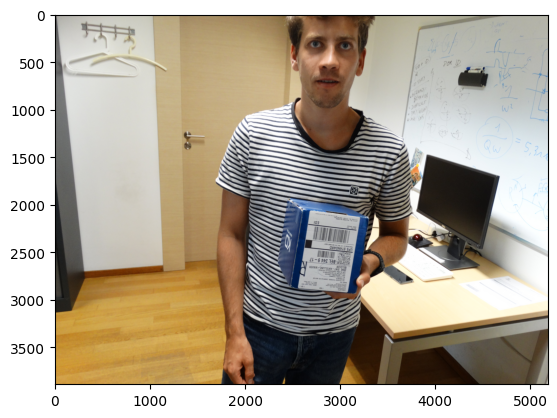

In [16]:
import cv2
from matplotlib import pyplot as plt
from  handle_json import read_json

data = read_json('..\\annotations.json')

print(data[0]['img_name'])
print(data[0]['projection'])
print(data[0]['world'])

image = cv2.imread('..\\data\\' + str(data[0]['img_name']))
w, h = image.shape[1], image.shape[0]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("width: ", w, "height: ", h)

plt.imshow(image)

In [7]:
edges = (
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 0),
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 4),
    (0, 4),
    (1, 5),
    (2, 6),
    (3, 7)
)

def drawpoint(image, points, center):
    img_copy = image.copy()
    for i in points:
        cv2.circle(img_copy, tuple(i), 0, (255,0,0), 50)
    
    cv2.circle(img_copy, tuple(center), 0, (0,255,0), 50)
    plt.imshow(img_copy)

def drawline(image, points):
    img_copy = image.copy()
    for i in edges:
        x = points[i[0]]
        y = points[i[1]]
        cv2.line(img_copy, (x[0], x[1]) , (y[0], y[1]), (255,0,0), 10)
    plt.imshow(img_copy)

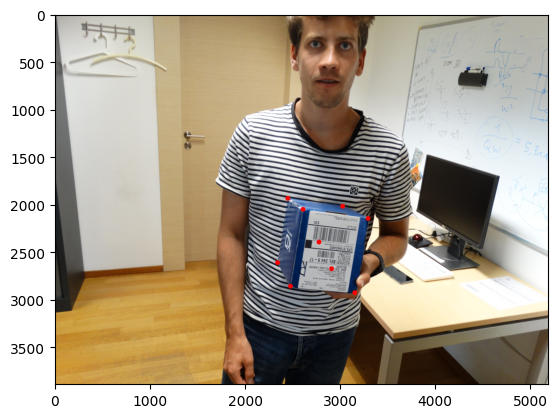

In [8]:
drawpoint(image, data[0]["projection"][:9], (0,0))

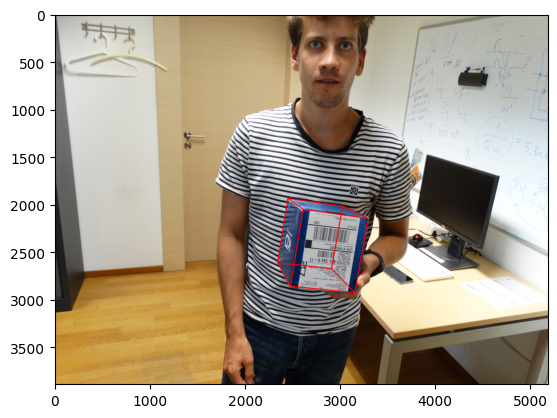

In [4]:
drawline(image, data[0]["projection"][0:8])

In [14]:
!pip install plotly==5.24.0 

In [15]:
# test 3d coordinates
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'notebook'

def plot_3d_world_coordinates(world_coordinates):
    # Extract X, Y, Z coordinates from the world coordinates
    x_coords = [coord[0] for coord in world_coordinates]
    y_coords = [coord[1] for coord in world_coordinates]
    z_coords = [coord[2] for coord in world_coordinates]

    # Create a 3D scatter plot
    scatter = go.Scatter3d(
        x=x_coords, 
        y=y_coords, 
        z=z_coords, 
        mode='markers',
        marker=dict(size=5, color='red', opacity=0.8)
    )

    # Set up the layout for the 3D plot
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X Axis'),
            yaxis=dict(title='Y Axis'),
            zaxis=dict(title='Z Axis')
        ),
        title="3D World Coordinates"
    )

    # Create the figure with the scatter plot and layout
    fig = go.Figure(data=[scatter], layout=layout)
    
    # Display the plot
    fig.show()

ModuleNotFoundError: No module named 'plotly'

  Using cached plotly-5.24.0-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.24.0-py3-none-any.whl (19.0 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.22.0
    Uninstalling plotly-5.22.0:
      Successfully uninstalled plotly-5.22.0


In [37]:
plot_3d_world_coordinates(data[0]['world'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed